In [1]:
using LinearAlgebra
using Plots
include("polynodes.jl")
include("aux_hfd.jl")
include("hfdTypes.jl")
include("postprocess.jl")

Main.HfdPostProcess

In [53]:
occ = Dict(
    -1 => [2 2 2 2 2 2 2], #s1/2
    1  => [2 2 2 2 2],   #p1/2
    -2 => [4 4 4 4 4],   #p3/2
    2  => [4 4 4 0.8],     #d3/2
    -3 => [6 6 6 1.2],     #d5/2
    3  => [6], #f5/2
    -4 => [8]
    )
#occ = Dict(-1 => [2 2],
#            1 => [2],
#            -2 => [4])
#occ = Dict(-1 => [2])
N, Nprec=357, 250
Z=90e0
grid = hfd_funcs.leg_rat_grid(N, 1e0)
#grid_prec = hfd_funcs.leg_exp_grid(Nprec, grid.xs[end])
cpars = hfd_funcs.CalcParams(Z, length(grid.xs);scale =0.5, alpha=1e-8)
cpars = hfd_funcs.CalcParams(Z, length(grid.xs);scale =0.5)
#cpars_prec = hfd_funcs.CalcParams(Z, length(grid_prec.xs))
@show(N=length(grid.xs))
occ_block, ztot = hfd_funcs.from_dict(occ, Float64, N)
println("Ztot=$ztot, sum_occs = $(sum(occ_block.occs))")
@time hfd_funcs.hcore_calc!(cpars, grid, occ_block)
@time hs = hfd_funcs.sc_coul_calc!(cpars, grid, occ_block; tol=1e-5, dump=0.5, maxiter=20, rc_hard=50);

N = length(grid.xs) = 357
Ztot=98.0, sum_occs = 90.0
+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 90.0
!atomic scale: 0.5 a.e
|fine structure constant: 0.0072973525643
|number of nodes in radial grid: 357
|maximal iteration number: 3
|tolerance: 1.0e-6
|dumping: 0.5 
| maximal rcut: 30.0 a.e.
|aitken accelerated: false
|non-interacting electrons approximation


+=========================================================
iter no: 1
κ      |δpot|
-4  0.0
-3  0.0
-2  0.0
-1  0.0
1  0.0
2  0.0
3  0.0
orbital energies:
[-4617.767493670903, -1192.2906834141768, -512.200390360373, -280.93912939884075, -176.66741108242616, -121.13857017304765, -88.15640163760939, -1192.2906834143641, -512.200390360341, -280.9391293988658, -176.6674110824484, -121.13857017303813, -467.1824866093659, -262.173744042784, -167.17418379432362, -115.69921458668323, -1041.3745048003993, -467.18248660941424, -262.1737440429379, -167

In [54]:
rep = HfdPostProcess.report(cpars, grid, occ_block; sortBy=:rhoav)

27×6 Matrix{Float64}:
 -1.0  1.0  -3999.16      1.0  0.0141456   0.000280338
  1.0  2.0   -708.702     1.0  0.0478072   0.00289081
 -2.0  1.0   -585.057     1.0  0.057759    0.00406603
 -1.0  2.0   -736.981     1.0  0.0587777   0.004163
  2.0  2.0   -123.184     1.0  0.140318    0.0231103
  1.0  3.0   -171.123     1.0  0.144329    0.0244027
 -3.0  1.0   -117.434     1.0  0.145647    0.0247693
 -1.0  3.0   -183.668     1.0  0.153259    0.0270335
 -2.0  2.0   -142.942     1.0  0.162352    0.0306336
  1.0  4.0    -40.1364    1.0  0.334074    0.127238
 -1.0  4.0    -45.6464    1.0  0.334867    0.126803
  2.0  3.0    -24.1627    1.0  0.369731    0.157731
 -2.0  3.0    -32.8967    1.0  0.371101    0.156503
  ⋮                                        ⋮
 -3.0  2.0    -22.838     1.0  0.380969    0.167206
 -1.0  5.0    -10.0036    1.0  0.706424    0.558409
  1.0  5.0     -7.92631   1.0  0.739242    0.614317
 -2.0  4.0     -6.26386   1.0  0.821453    0.758178
  2.0  4.0     -3.27204   1.0  0.9358

In [55]:
#cpars = hfd_funcs.CalcParams(Z, length(grid.xs);scale =0.5)
@time hfd_funcs.hfd_calc!(cpars, grid, occ_block; tol=1e-5, dump=0.3,
    maxiter=40, ecp=nothing, rc_hard=100);

+=========================================================
|Starting calc_occ iterations                             
|atomic charge: 90.0
!atomic scale: 0.5 a.e
|fine structure constant: 0.0072973525643
|number of nodes in radial grid: 357
|maximal iteration number: 40
|tolerance: 1.0e-5
|dumping: 0.3 
| maximal rcut: 100 a.e.
|aitken accelerated: false
|Dirac Hartree Fock


+=========================================================
iter no: 1
κ      |δpot|
-4  0.6032386876440498
-3  0.6252748357692177
-2  0.6251237399882864
-1  0.602826556439537
1  0.602928107958277
2  0.6029494630416518
3  0.6032929759786495
orbital energies:
[-4068.7101227176763, -762.9538917293777, -195.66653540423135, -51.55083838911083, -12.104134879836993, -2.229508908489278, -0.23880383646043501, -733.6411124444604, -182.57923375812558, -45.670253592360226, -9.750974104177974, -1.4536867786746412, -132.73560795234795, -28.537404418922993, -4.356930349907383, -0.04368142754066191, -607.028092483594, -153.158223

In [21]:
rep = HfdPostProcess.report(cpars, grid, occ_block; sortBy=:rhoav)

27×6 Matrix{Float64}:
 -1.0  1.0  -4064.17       1.0  0.0140817   0.000277866
  1.0  2.0   -730.021      1.0  0.0475208   0.00285667
 -2.0  1.0   -603.619      1.0  0.0574438   0.00402228
 -1.0  2.0   -759.558      1.0  0.0583869   0.0041094
  2.0  2.0   -130.365      1.0  0.139146    0.0227297
  1.0  3.0   -180.215      1.0  0.143051    0.023979
 -3.0  1.0   -124.413      1.0  0.144445    0.0243668
 -1.0  3.0   -193.396      1.0  0.151814    0.0265375
 -2.0  2.0   -150.949      1.0  0.160875    0.0301051
  1.0  4.0    -44.4154     1.0  0.33035     0.124245
 -1.0  4.0    -50.316      1.0  0.331107    0.123828
  2.0  3.0    -27.3843     1.0  0.363197    0.152039
 -2.0  3.0    -36.7756     1.0  0.364914    0.151293
  ⋮                                         ⋮
 -3.0  2.0    -25.9617     1.0  0.373895    0.160887
 -1.0  5.0    -11.6441     1.0  0.701666    0.549676
  1.0  5.0     -9.31205    1.0  0.733099    0.602778
 -2.0  4.0     -7.56685    1.0  0.80783     0.7315
  2.0  4.0     -4.041

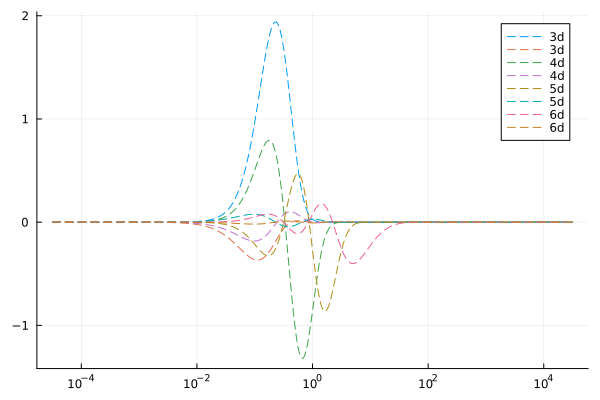

In [47]:
ds_inds = findall(occ_block.ks .== 2)
pqs = reshape(occ_block.vecs, cpars.N, 2, :)
plot()
for ii  in ds_inds
    plot!(grid.xs, pqs[:, :, ii]; xaxis=:log, label="$(occ_block.inds[ii]+1)d", ls=:dash)
end
s_inds = findall(occ_block.ks .== -1)
for ii  in s_inds
#    plot!(grid.xs, pqs[:, :, ii]; xaxis=:log, label="$(occ_block.inds[ii])s", ls=:dot)
end
plot!()

In [37]:
plotattr(:Series)

Defined Series attributes are:
arrow, bar_edges, bar_position, bar_width, bins, colorbar_entry, connections, contour_labels, contours, extra_kwargs, fill_z, fillalpha, fillcolor, fillrange, fillstyle, group, hover, label, levels, line_z, linealpha, linecolor, linestyle, linewidth, marker_z, markeralpha, markercolor, markershape, markersize, markerstrokealpha, markerstrokecolor, markerstrokestyle, markerstrokewidth, normalize, orientation, permute, primary, quiver, ribbon, series_annotations, seriesalpha, seriescolor, seriestype, show_empty_bins, smooth, stride, subplot, weights, x, xerror, y, yerror, z, z_order, zerror
